In [1]:
import pandas as pd
import warnings
import numpy as np
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('dataset.xlsx')
df.head()

,Sentence,Outcome
0,What is the difference between depression and ...,C
1,What are other psychiatric conditions that can...,C
2,Why is depression more prevalent in women than...,C
3,What happens during menopause with regards to ...,C
4,What efforts are underway to improve treatment...,C


In [3]:
col = ['Sentence', 'Outcome']
df = df[col]
df.columns = ['Sentence', 'Outcome']
df['category_id'] = df['Outcome'].factorize()[0]
category_id_df = df[['Outcome', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Outcome']].values)
df.head()

,Sentence,Outcome,category_id
0,What is the difference between depression and ...,C,0
1,What are other psychiatric conditions that can...,C,0
2,Why is depression more prevalent in women than...,C,0
3,What happens during menopause with regards to ...,C,0
4,What efforts are underway to improve treatment...,C,0


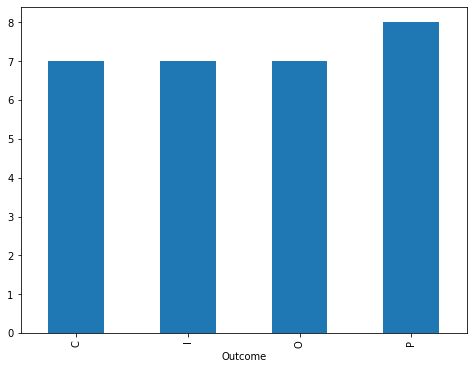

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Outcome').Sentence.count().plot.bar(ylim=0)
plt.show()

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [6]:
def tokenize(column):
    tokens = word_tokenize(column)
    return [w for w in tokens if w.isalpha()]   

In [7]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [8]:
df['Sentence']=df['Sentence'].str.lower()
df[['Sentence']].head()

,Sentence
0,what is the difference between depression and ...
1,what are other psychiatric conditions that can...
2,why is depression more prevalent in women than...
3,what happens during menopause with regards to ...
4,what efforts are underway to improve treatment...


In [9]:
df['tokenized'] = df.apply(lambda x: tokenize(x['Sentence']), axis=1)
df[['tokenized']].head()

,tokenized
0,"[what, is, the, difference, between, depressio..."
1,"[what, are, other, psychiatric, conditions, th..."
2,"[why, is, depression, more, prevalent, in, wom..."
3,"[what, happens, during, menopause, with, regar..."
4,"[what, efforts, are, underway, to, improve, tr..."


In [10]:
stop = stopwords.words('english')
df['NoStopWords']=df['tokenized'].apply(lambda x: [item for item in x if item not in stop])
df[['NoStopWords']].head()

,NoStopWords
0,"[difference, depression, sadness]"
1,"[psychiatric, conditions, depression]"
2,"[depression, prevalent, women, men]"
3,"[happens, menopause, regards, brain, depression]"
4,"[efforts, underway, improve, treatment, depres..."


In [11]:
df['lemmatized']=df['NoStopWords'].apply(lambda x: lemmatize_text(x))
df[['lemmatized']].head()

,lemmatized
0,"[difference, depression, sadness]"
1,"[psychiatric, condition, depression]"
2,"[depression, prevalent, woman, men]"
3,"[happens, menopause, regard, brain, depression]"
4,"[effort, underway, improve, treatment, depress..."


In [12]:
texts=[]
for item in df['lemmatized']:
    texts.append(" ".join(item))
texts

['difference depression sadness',
 'psychiatric condition depression',
 'depression prevalent woman men',
 'happens menopause regard brain depression',
 'effort underway improve treatment depression',
 'researcher far failed identify common gene mutation contribute risk major depression',
 'could health condition contributing symptom depression',
 'depression treatable',
 'depression diagnosed treated',
 'promising recent development treat depression',
 'depression treated',
 'idea horizon better effective way treat depression',
 'brain scan guide treatment depression',
 'need medicine treat depression',
 'depression affect physical health',
 'treatment depression',
 'depression later life',
 'might depression affect appetite weight',
 'could depression affect sleep',
 'depression cause lack concentration',
 'could depression causing physical pain',
 'cause depression',
 'risk depression',
 'depression affect child',
 'postpartum depression',
 'depression',
 'sign symptom depression',


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [14]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(texts)
matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
print(vectorizer.get_feature_names(),len(vectorizer.get_feature_names()))

['affect', 'appetite', 'better', 'brain', 'cause', 'causing', 'child', 'common', 'concentration', 'condition', 'contribute', 'contributing', 'could', 'depression', 'development', 'diagnosed', 'difference', 'effective', 'effort', 'failed', 'far', 'gene', 'guide', 'happens', 'health', 'horizon', 'idea', 'identify', 'improve', 'lack', 'later', 'life', 'major', 'medicine', 'men', 'menopause', 'might', 'mutation', 'need', 'pain', 'physical', 'postpartum', 'ppd', 'prevalent', 'promising', 'psychiatric', 'recent', 'regard', 'researcher', 'risk', 'sadness', 'scan', 'sign', 'sleep', 'symptom', 'treat', 'treatable', 'treated', 'treatment', 'underway', 'way', 'weight', 'woman'] 63


In [16]:
vector_matrix=pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
vector_matrix.head()

,affect,appetite,better,brain,cause,causing,child,common,concentration,condition,contribute,contributing,could,depression,development,diagnosed,difference,effective,effort,failed,far,gene,guide,happens,health,horizon,idea,identify,improve,lack,later,life,major,medicine,men,menopause,might,mutation,need,pain,physical,postpartum,ppd,prevalent,promising,psychiatric,recent,regard,researcher,risk,sadness,scan,sign,sleep,symptom,treat,treatable,treated,treatment,underway,way,weight,woman
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, norm='l2')
matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_matrix=pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_matrix.head()

,affect,appetite,better,brain,cause,causing,child,common,concentration,condition,contribute,contributing,depression,development,diagnosed,difference,effective,effort,failed,far,gene,guide,happens,health,horizon,idea,identify,improve,lack,later,life,major,medicine,men,menopause,mutation,need,pain,physical,postpartum,ppd,prevalent,promising,psychiatric,recent,regard,researcher,risk,sadness,scan,sign,sleep,symptom,treat,treatable,treated,treatment,underway,way,weight,woman
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.187320,0.0,0.0,0.69459,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.69459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.652009,0.0,0.0,0.197424,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.732057,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.153848,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.570477,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.570477,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.570477
3,0.0,0.0,0.0,0.452979,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.137159,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.508592,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.508592,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.508592,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.139566,0.0,0.0,0.00000,0.0,0.517516,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.517516,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420777,0.517516,0.0,0.0,0.000000


In [18]:
X=tfidf_matrix
X.shape

(29, 61)

In [19]:
y=df['category_id'].values
y.shape

(29,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)
X_train=X
y_train=y

X_test.shape,y_test.shape

((24, 61), (24,))

In [21]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [22]:
seed=1
models = ['ADB',
          'RFC',
          'KNC',
          'SVC',
          'logisticRegression']
clfs = [AdaBoostClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')]

In [23]:
params = {models[0]:{'learning_rate':[0.01], 'n_estimators':[150]},
          models[1]:{'n_estimators':[100], 'criterion':['gini'],'min_samples_split':[2],
                     'min_samples_leaf': [4]},
          models[2]:{'n_neighbors':[5], 'weights':['distance'],'leaf_size':[15]},
          models[3]: {'C':[100], 'tol': [0.005],'kernel':['sigmoid']},
          models[4]: {'C':[2000], 'tol': [0.0001]}
         }

In [24]:
y_testScores=0
test_scores = []

In [25]:
for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    y_testScores+=estimates

    acc = accuracy_score(y_test,clf.predict(X_test))
    print("Accuracy: {:.4%}".format(acc))
    print()
    
    test_scores.append((acc,clf.best_score_))

ADB
best params: {'learning_rate': 0.01, 'n_estimators': 150}
best scores: 0.4133333333333333
Accuracy: 70.8333%

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.3466666666666667
Accuracy: 45.8333%

KNC
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.4533333333333333
Accuracy: 100.0000%

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.005}
best scores: 0.5266666666666667
Accuracy: 100.0000%

logisticRegression
best params: {'C': 2000, 'tol': 0.0001}
best scores: 0.5266666666666667
Accuracy: 100.0000%



In [26]:
knc=KNeighborsClassifier(leaf_size=15, n_neighbors=5, weights='distance')
knc.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=15, weights='distance')

In [27]:
Y_pred = knc.predict(X_test)
y_proba = knc.predict_proba(X_test)
print(metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



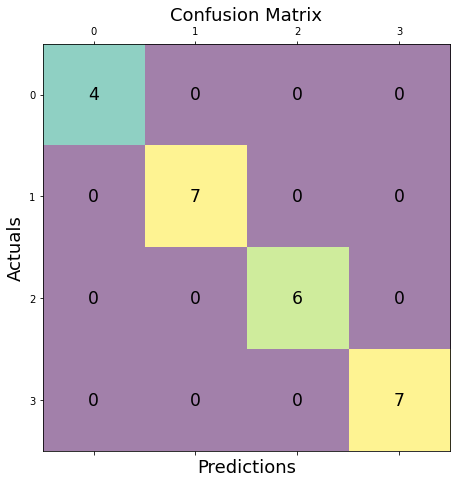

In [28]:
conf_matrix=metrics.confusion_matrix(y_test, Y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
ROC_AUC=metrics.roc_auc_score(y_test, y_proba,multi_class="ovo",average="macro")
print(f"Accuracy Score: {metrics.accuracy_score(y_test, Y_pred)*100}%")
print(f"ROC AUC Score: {ROC_AUC*100}%")
print(f"Recall Score: {metrics.recall_score(y_test, Y_pred, average=None)*100}")

Accuracy Score: 100.0%
ROC AUC Score: 100.0%
Recall Score: [100. 100. 100. 100.]


In [30]:
from lazypredict.Supervised import LazyClassifier

In [31]:
reg=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=reg.fit(X_train,X_test,y_train,y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.02
RidgeClassifierCV,1.00,1.00,None,1.00,0.02
RandomForestClassifier,1.00,1.00,None,1.00,0.13
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
Perceptron,1.00,1.00,None,1.00,0.00
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
NuSVC,1.00,1.00,None,1.00,0.00
NearestCentroid,1.00,1.00,None,1.00,0.01
LogisticRegression,1.00,1.00,None,1.00,0.01


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=300)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

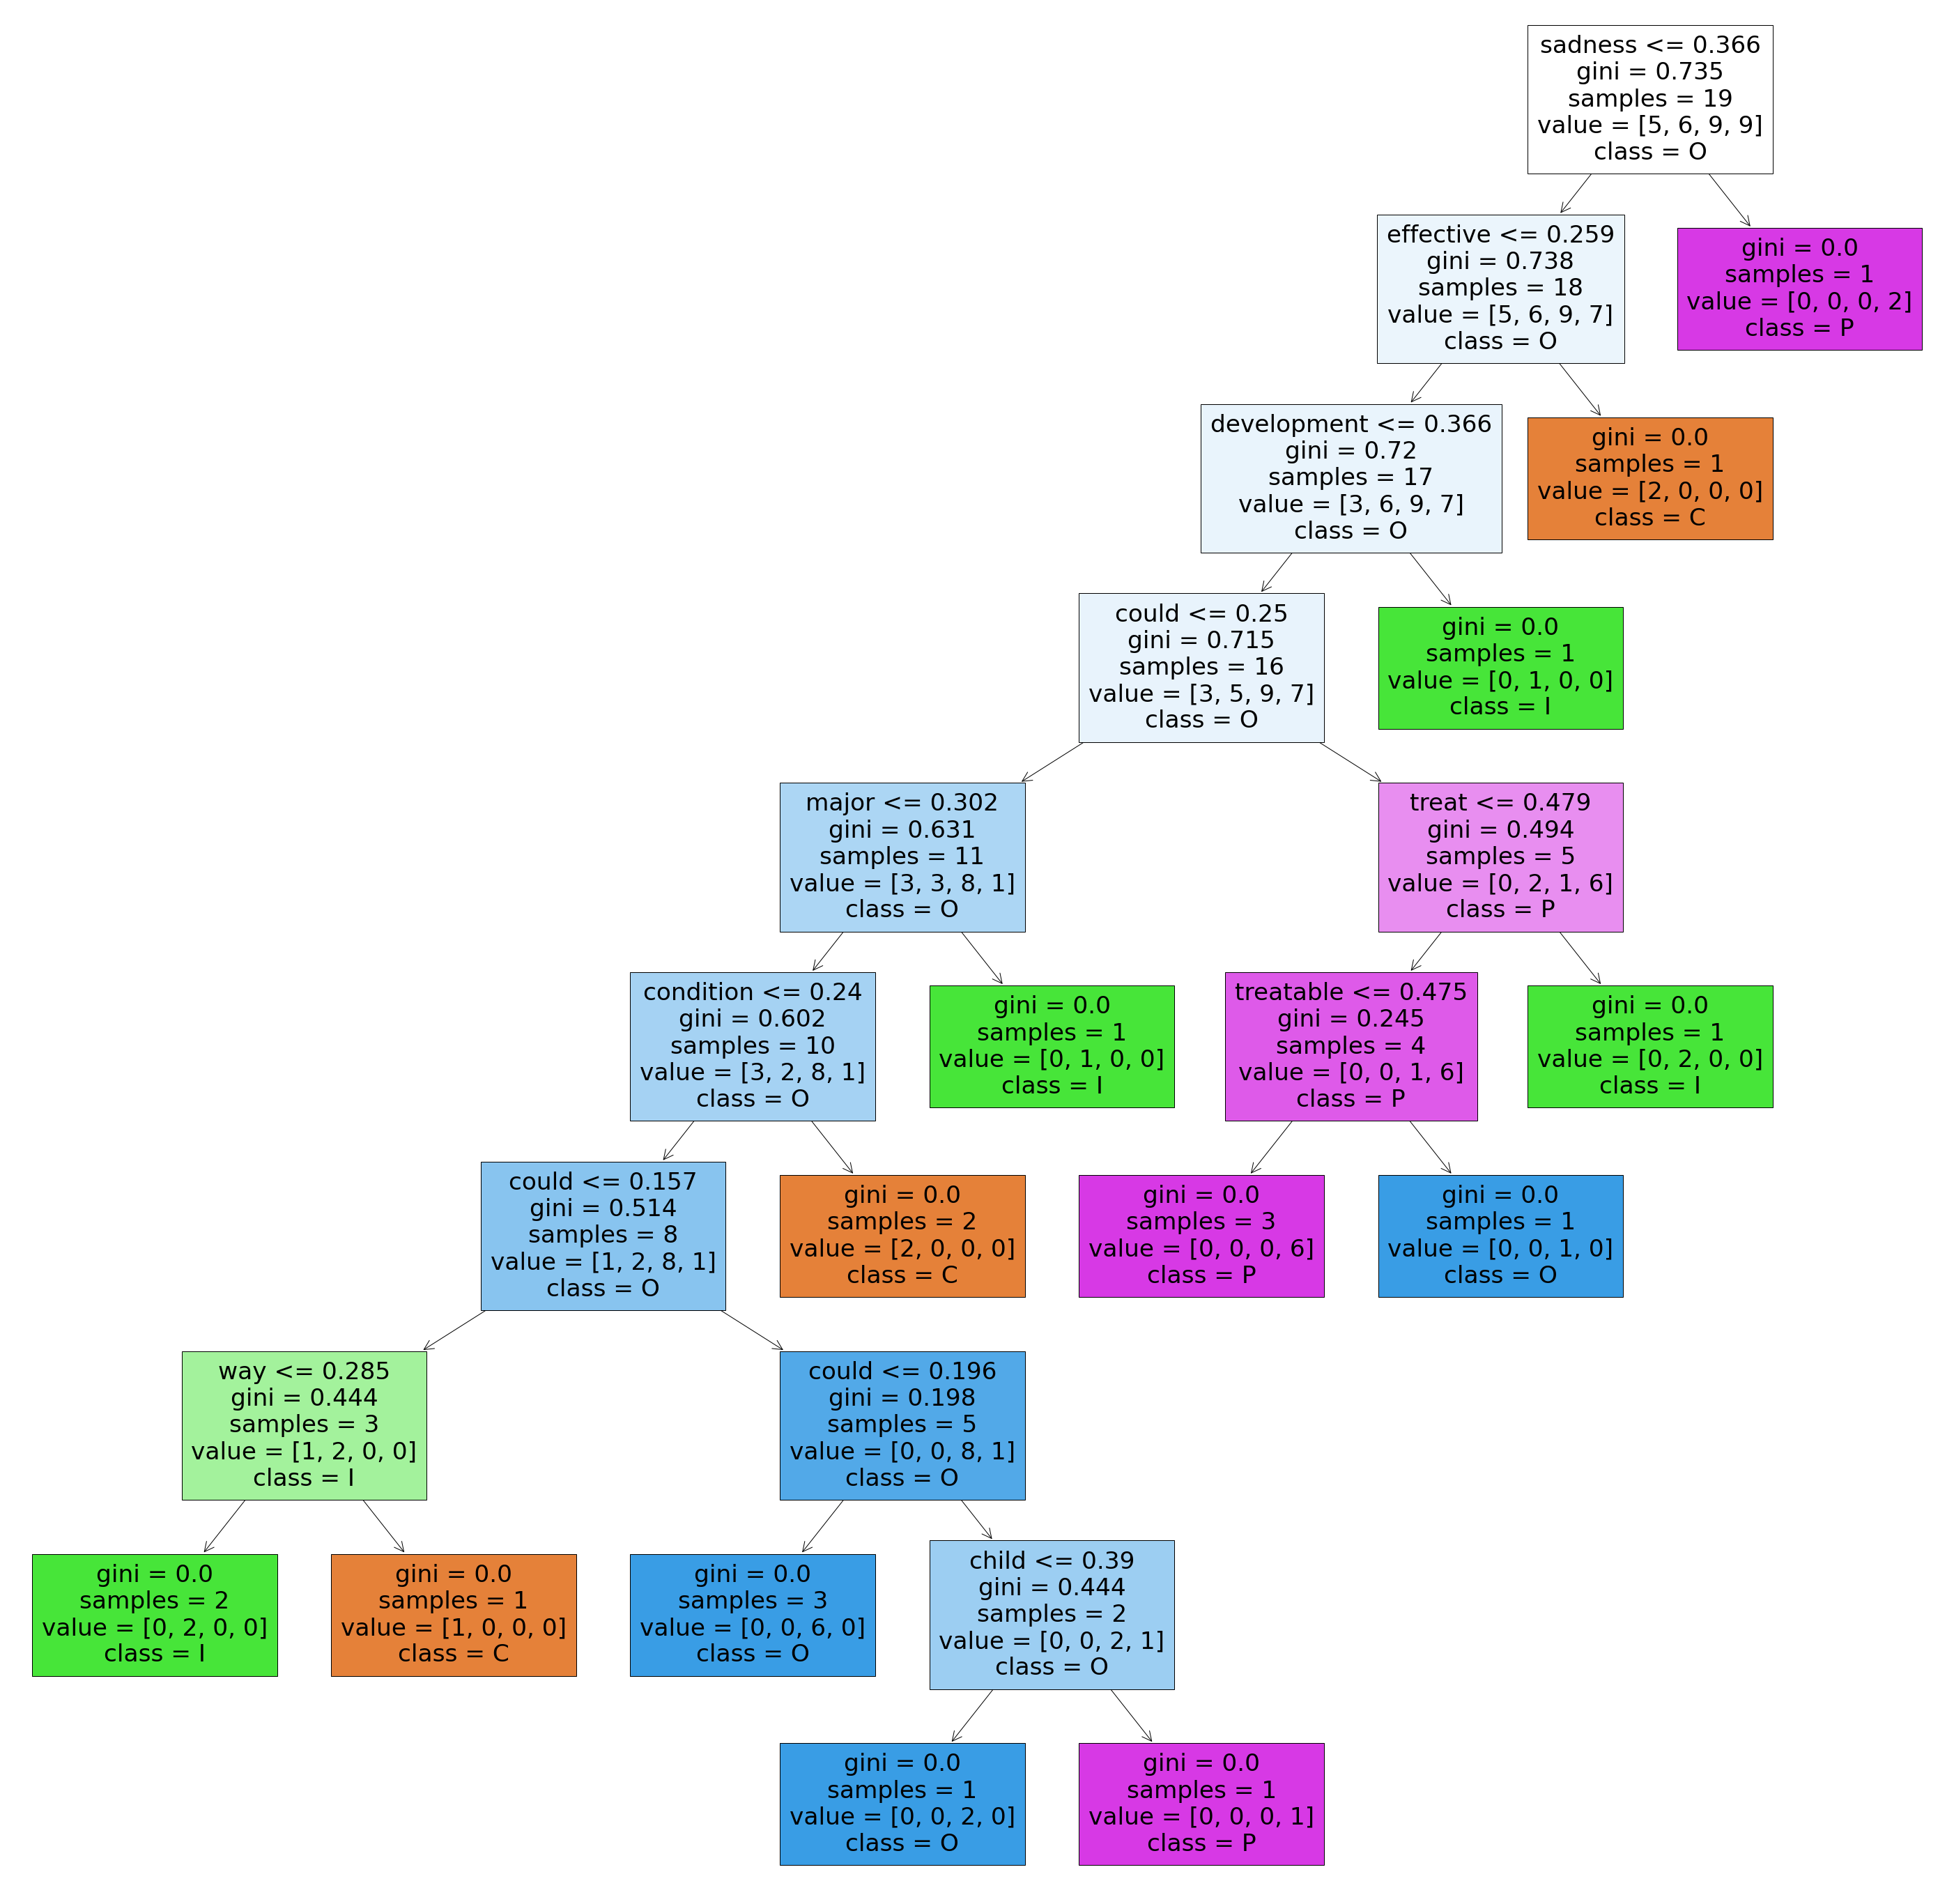

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf.estimators_[5],feature_names=['affect', 'appetite', 'better', 'brain', 'cause', 'causing', 'child', 'common', 
                                          'concentration', 'condition', 'contribute', 'contributing', 'could', 'depression',
                                          'development', 'diagnosed', 'difference', 'effective', 'effort', 'failed', 'far', 
                                          'gene', 'guide', 'happens', 'health', 'horizon', 'idea', 'identify', 'improve', 
                                          'lack', 'later', 'life', 'major', 'medicine', 'men', 'menopause', 'might', 
                                          'mutation', 'need', 'pain', 'physical', 'postpartum', 'ppd', 'prevalent', 
                                          'promising', 'psychiatric', 'recent', 'regard', 'researcher', 'risk', 'sadness', 
                                          'scan', 'sign', 'sleep', 'symptom', 'treat', 'treatable', 'treated', 'treatment', 
                                          'underway', 'way', 'weight', 'woman'],class_names=['C','I','O','P'],filled=True);

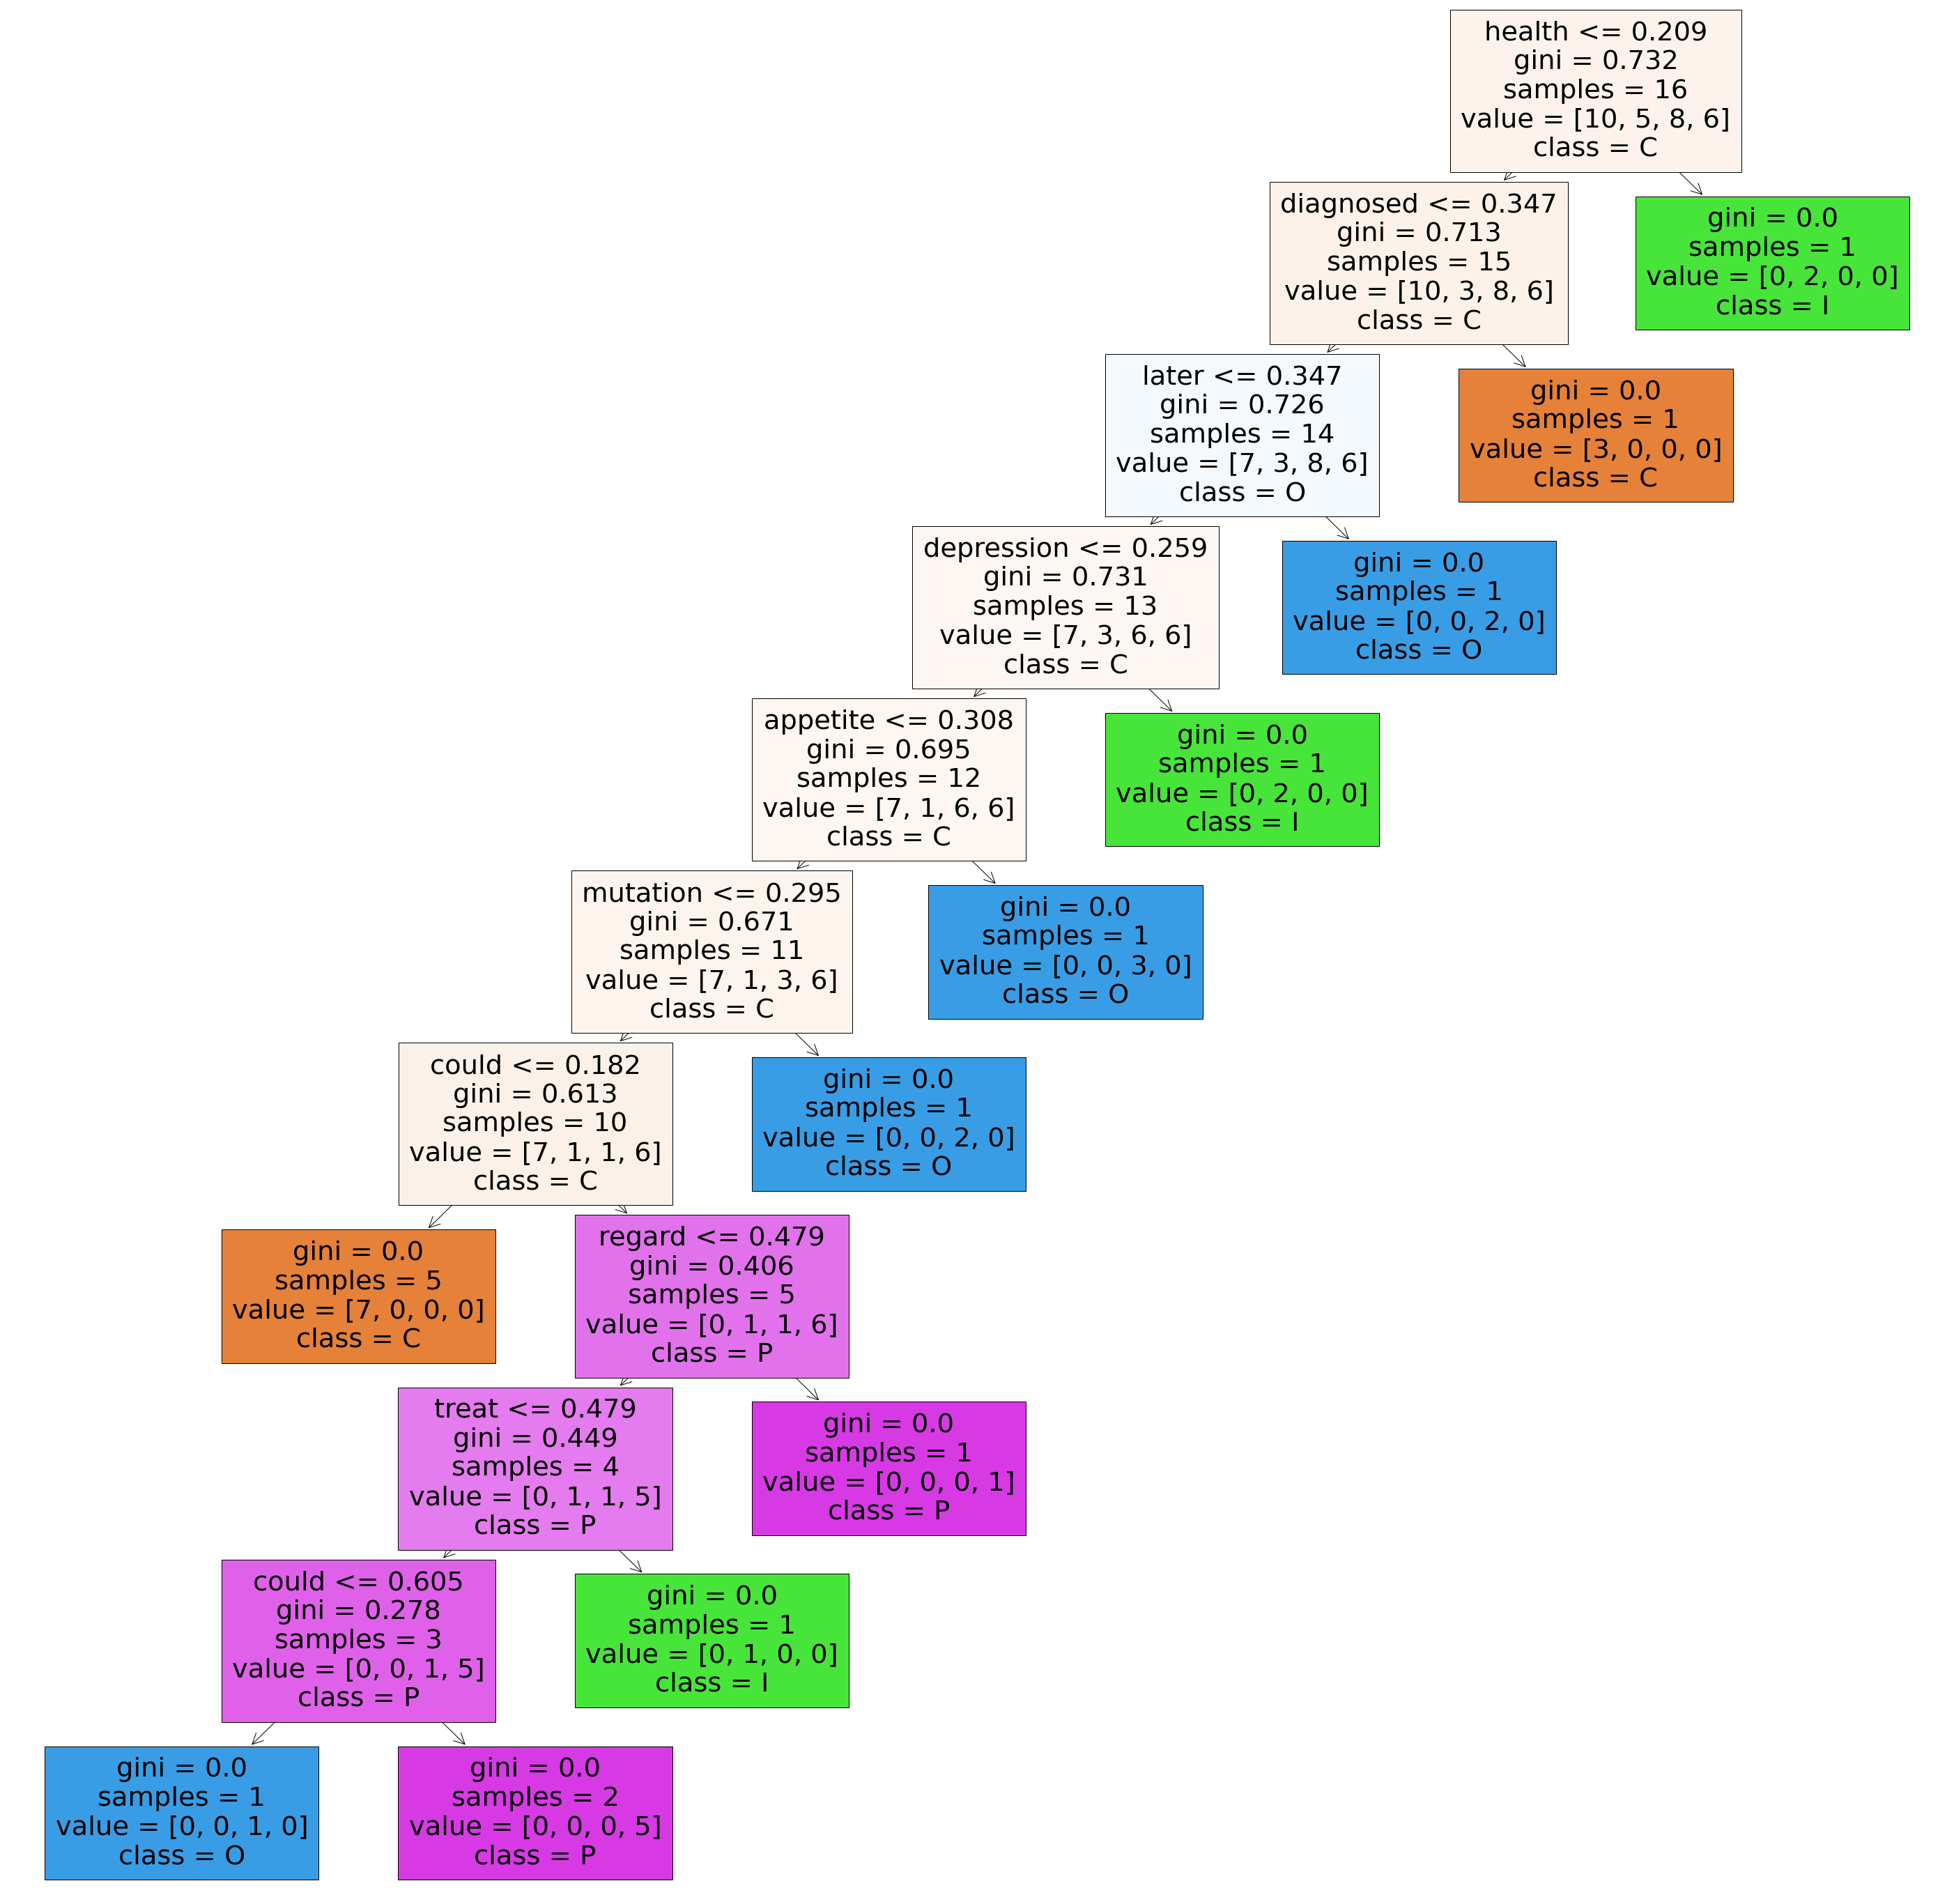

In [35]:
plt.figure(figsize=(50,50))
plot_tree(rf.estimators_[30],feature_names=['affect', 'appetite', 'better', 'brain', 'cause', 'causing', 'child', 'common', 
                                          'concentration', 'condition', 'contribute', 'contributing', 'could', 'depression',
                                          'development', 'diagnosed', 'difference', 'effective', 'effort', 'failed', 'far', 
                                          'gene', 'guide', 'happens', 'health', 'horizon', 'idea', 'identify', 'improve', 
                                          'lack', 'later', 'life', 'major', 'medicine', 'men', 'menopause', 'might', 
                                          'mutation', 'need', 'pain', 'physical', 'postpartum', 'ppd', 'prevalent', 
                                          'promising', 'psychiatric', 'recent', 'regard', 'researcher', 'risk', 'sadness', 
                                          'scan', 'sign', 'sleep', 'symptom', 'treat', 'treatable', 'treated', 'treatment', 
                                          'underway', 'way', 'weight', 'woman'],class_names=['C','I','O','P'],filled=True);

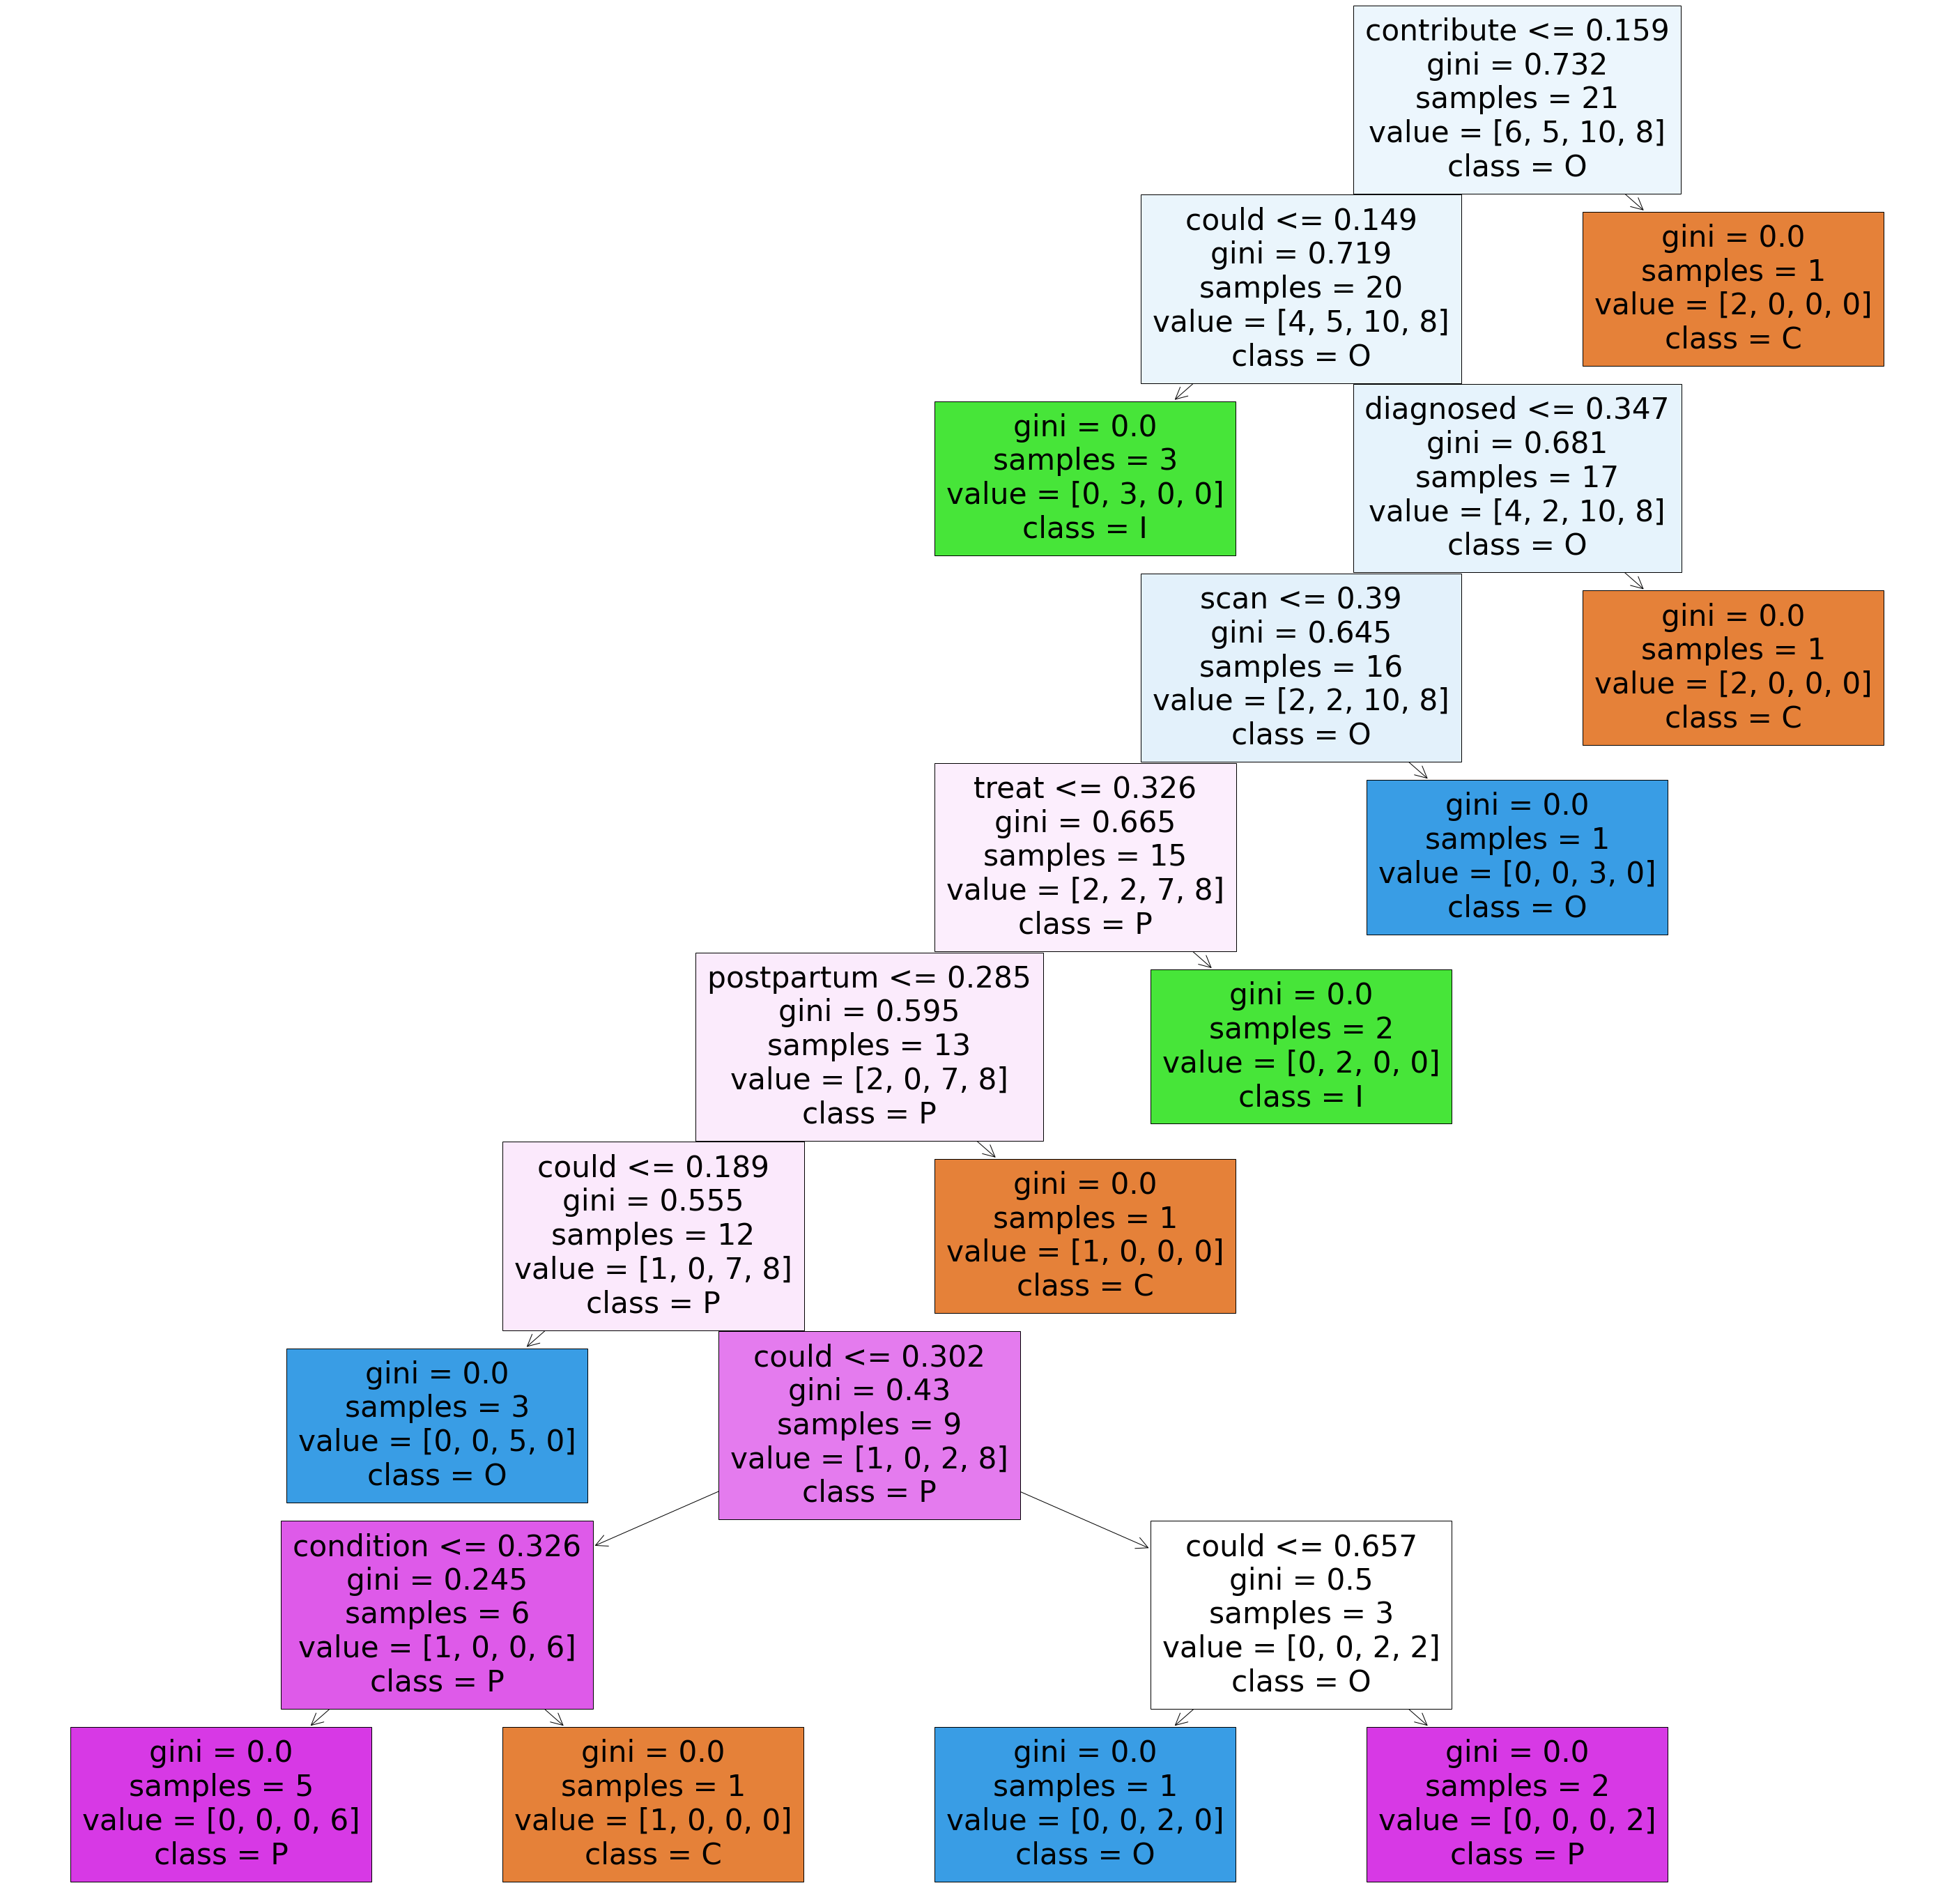

In [36]:
plt.figure(figsize=(50,50))
plot_tree(rf.estimators_[27],feature_names=['affect', 'appetite', 'better', 'brain', 'cause', 'causing', 'child', 'common', 
                                          'concentration', 'condition', 'contribute', 'contributing', 'could', 'depression',
                                          'development', 'diagnosed', 'difference', 'effective', 'effort', 'failed', 'far', 
                                          'gene', 'guide', 'happens', 'health', 'horizon', 'idea', 'identify', 'improve', 
                                          'lack', 'later', 'life', 'major', 'medicine', 'men', 'menopause', 'might', 
                                          'mutation', 'need', 'pain', 'physical', 'postpartum', 'ppd', 'prevalent', 
                                          'promising', 'psychiatric', 'recent', 'regard', 'researcher', 'risk', 'sadness', 
                                          'scan', 'sign', 'sleep', 'symptom', 'treat', 'treatable', 'treated', 'treatment', 
                                          'underway', 'way', 'weight', 'woman'],class_names=['C','I','O','P'],filled=True);

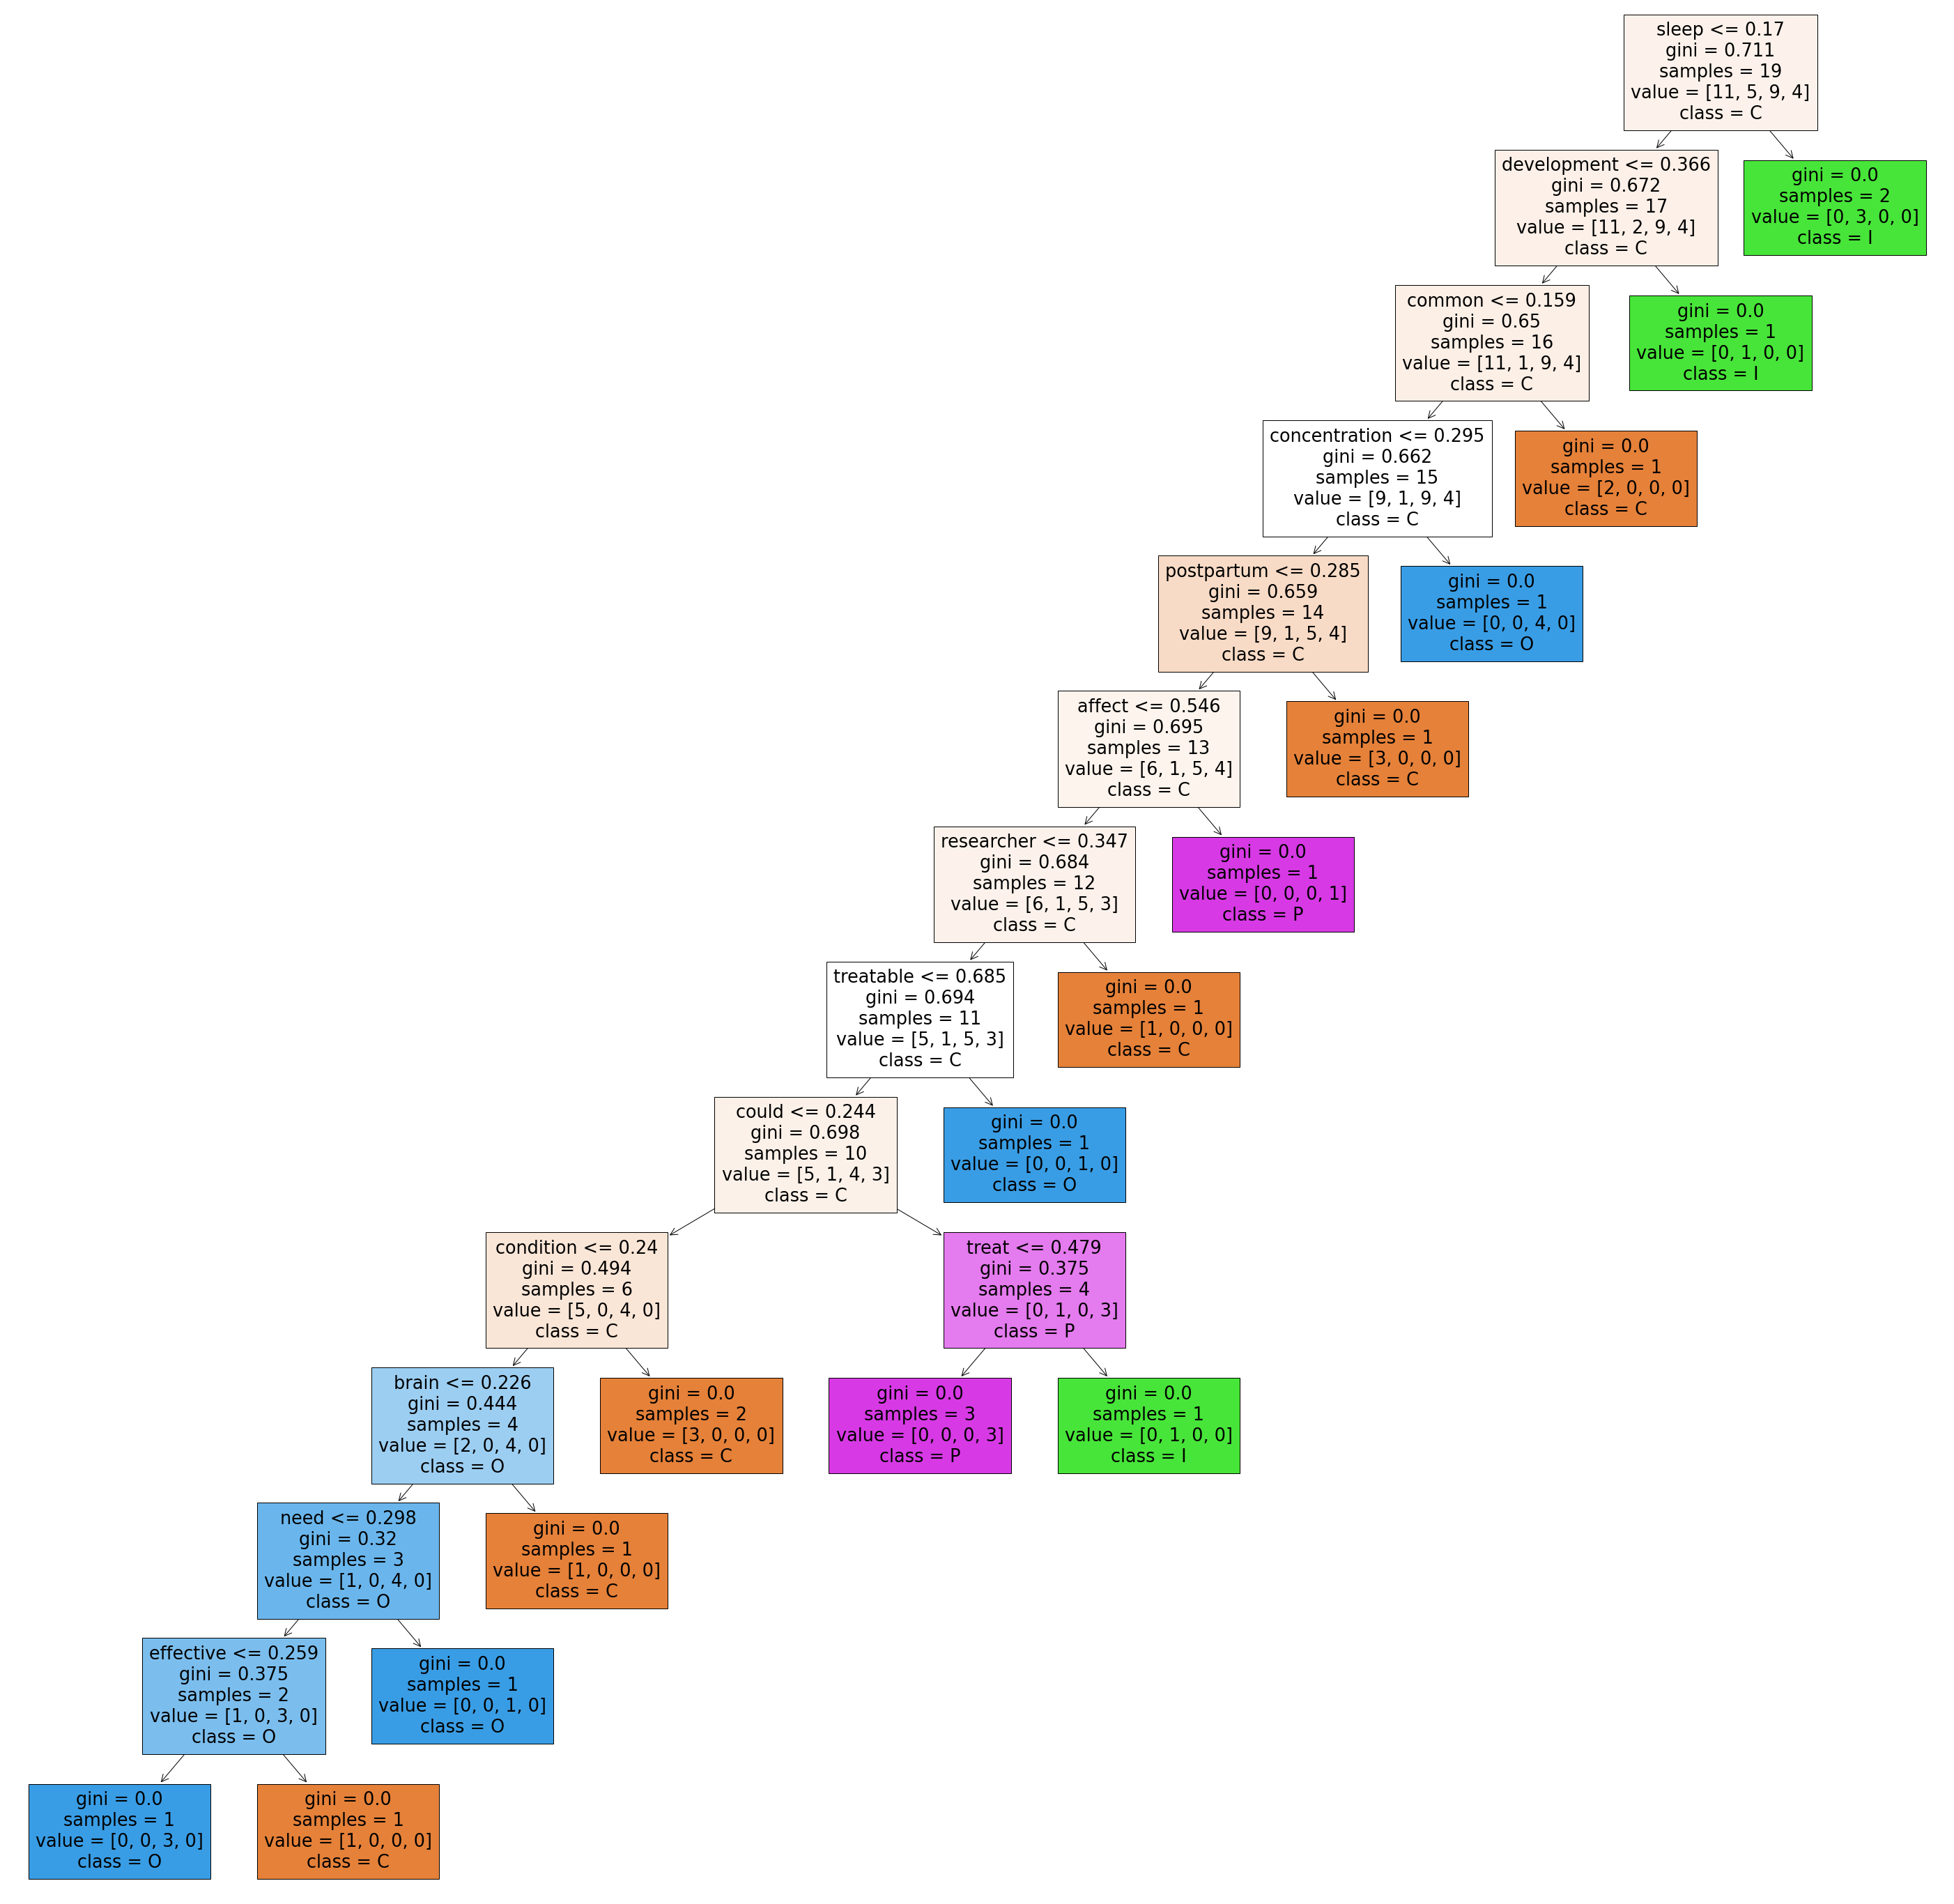

In [37]:
plt.figure(figsize=(50,50))
plot_tree(rf.estimators_[95],feature_names=['affect', 'appetite', 'better', 'brain', 'cause', 'causing', 'child', 'common', 
                                          'concentration', 'condition', 'contribute', 'contributing', 'could', 'depression',
                                          'development', 'diagnosed', 'difference', 'effective', 'effort', 'failed', 'far', 
                                          'gene', 'guide', 'happens', 'health', 'horizon', 'idea', 'identify', 'improve', 
                                          'lack', 'later', 'life', 'major', 'medicine', 'men', 'menopause', 'might', 
                                          'mutation', 'need', 'pain', 'physical', 'postpartum', 'ppd', 'prevalent', 
                                          'promising', 'psychiatric', 'recent', 'regard', 'researcher', 'risk', 'sadness', 
                                          'scan', 'sign', 'sleep', 'symptom', 'treat', 'treatable', 'treated', 'treatment', 
                                          'underway', 'way', 'weight', 'woman'],class_names=['C','I','O','P'],filled=True);

In [38]:
Y_pred = rf.predict(X_test)
y_proba = knc.predict_proba(X_test)
print(metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



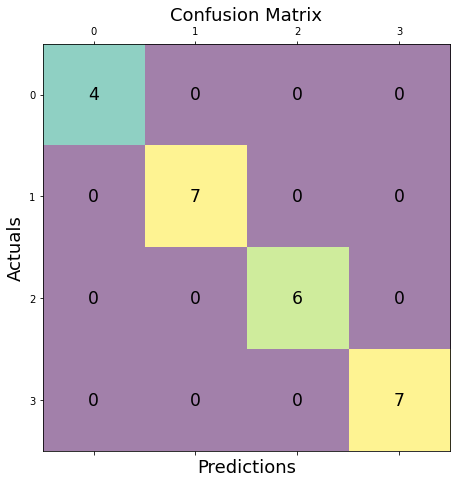

In [39]:
conf_matrix=metrics.confusion_matrix(y_test, Y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [40]:
ROC_AUC=metrics.roc_auc_score(y_test, y_proba,multi_class="ovo",average="macro")
print(f"Accuracy Score: {metrics.accuracy_score(y_test, Y_pred)*100}%")
print(f"ROC AUC Score: {ROC_AUC*100}%")
print(f"Recall Score: {metrics.recall_score(y_test, Y_pred, average=None)*100}")

Accuracy Score: 100.0%
ROC AUC Score: 100.0%
Recall Score: [100. 100. 100. 100.]


In [41]:
import pickle

with open('PICO_Classifier_RF','wb') as f:
    pickle.dump(rf,f)


In [ ]:
questions = ["What causes depression?", "how can i treat depression?", "is depression chronic",
             "What does it feel like to have depression?"]

custom_pred=